In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

credit_df = pd.read_csv("Credit_card.csv")
credit_df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2


In [57]:
label_df = pd.read_csv("Credit_card_label.csv")
label_df.head()

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1


In [58]:
credit_df = pd.merge(credit_df, label_df, on = "Ind_ID", how = "outer")
credit_df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5008865,F,Y,Y,2,135000.0,Working,Secondary / secondary special,Married,House / apartment,-15761.0,-3173,1,0,0,0,Laborers,4,0
2,5008889,F,N,Y,0,247500.0,Commercial associate,Higher education,Separated,Rented apartment,-17016.0,-1347,1,0,0,0,Core staff,1,0
3,5009000,M,Y,Y,0,157500.0,Working,Secondary / secondary special,Married,House / apartment,-9927.0,-828,1,0,0,0,Drivers,2,0
4,5009023,F,N,Y,2,216000.0,State servant,Higher education,Married,House / apartment,-15444.0,-3112,1,0,0,1,NaN,4,0


In [59]:
from sklearn.preprocessing import LabelEncoder
class_labels = LabelEncoder()

credit_df["Annual_income"] = credit_df["Annual_income"].fillna(credit_df["Annual_income"].median())
credit_df["GENDER"] = class_labels.fit_transform(credit_df["GENDER"].values)
credit_df["Car_Owner"] = class_labels.fit_transform(credit_df["Car_Owner"].values)
credit_df["Propert_Owner"] = class_labels.fit_transform(credit_df["Propert_Owner"].values)
credit_df["Marital_status"] = class_labels.fit_transform(credit_df["Marital_status"].values)
credit_df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,1,1,1,0,180000.0,Pensioner,Higher education,1,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5008865,0,1,1,2,135000.0,Working,Secondary / secondary special,1,House / apartment,-15761.0,-3173,1,0,0,0,Laborers,4,0
2,5008889,0,0,1,0,247500.0,Commercial associate,Higher education,2,Rented apartment,-17016.0,-1347,1,0,0,0,Core staff,1,0
3,5009000,1,1,1,0,157500.0,Working,Secondary / secondary special,1,House / apartment,-9927.0,-828,1,0,0,0,Drivers,2,0
4,5009023,0,0,1,2,216000.0,State servant,Higher education,1,House / apartment,-15444.0,-3112,1,0,0,1,NaN,4,0


In [70]:
credit_df.columns

Index(['GENDER', 'label'], dtype='object')

In [69]:
credit_corr = credit_df[["GENDER", "Car_Owner", "Propert_Owner", "CHILDREN", "Marital_status", "label"]]

KeyError: "['Car_Owner', 'Propert_Owner', 'CHILDREN', 'Marital_status'] not in index"

In [63]:
from sklearn.linear_model import LinearRegression
credit_df = credit_df[["GENDER", "label"]]

def linear(x_label, y_label):
    X = credit_df[x_label]
    y = credit_df[y_label]
linear("GENDER", "label")

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [65]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [66]:
y_pred = regression_model.predict(X_test)
y_pred

array([0.09071534, 0.09071534, 0.09071534, 0.14809527, 0.09071534,
       0.09071534, 0.14809527, 0.09071534, 0.14809527, 0.09071534,
       0.09071534, 0.14809527, 0.09071534, 0.09071534, 0.09071534,
       0.09071534, 0.14809527, 0.09071534, 0.09071534, 0.09071534,
       0.09071534, 0.14809527, 0.09071534, 0.09071534, 0.09071534,
       0.09071534, 0.09071534, 0.09071534, 0.14809527, 0.14809527,
       0.09071534, 0.09071534, 0.09071534, 0.14809527, 0.14809527,
       0.09071534, 0.09071534, 0.09071534, 0.09071534, 0.09071534,
       0.14809527, 0.14809527, 0.14809527, 0.09071534, 0.09071534,
       0.09071534, 0.09071534, 0.09071534, 0.09071534, 0.14809527,
       0.14809527, 0.09071534, 0.14809527, 0.14809527, 0.09071534,
       0.14809527, 0.09071534, 0.09071534, 0.14809527, 0.09071534,
       0.09071534, 0.09071534, 0.14809527, 0.14809527, 0.14809527,
       0.09071534, 0.09071534, 0.09071534, 0.09071534, 0.09071534,
       0.09071534, 0.14809527, 0.09071534, 0.09071534, 0.09071

In [67]:
accuracy_score = regression.score(X_test, y_test)
accuracy_score

C:\Users\stdan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


0.886021505376344

In [68]:
credit_corr.corr()

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Marital_status,label
GENDER,1.000000,0.369233,-0.045975,0.058581,-0.118060,0.079374
Car_Owner,0.369233,1.000000,0.002401,0.063467,-0.135318,-0.014734
Propert_Owner,-0.045975,0.002401,1.000000,-0.003352,0.004493,-0.017906
CHILDREN,0.058581,0.063467,-0.003352,1.000000,-0.158954,-0.021646
Marital_status,-0.118060,-0.135318,0.004493,-0.158954,1.000000,0.057885
label,0.079374,-0.014734,-0.017906,-0.021646,0.057885,1.000000


<Axes: >

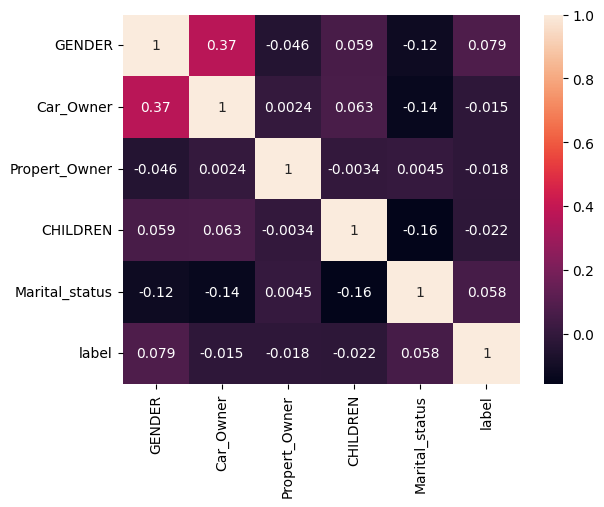

In [32]:
sns.heatmap(credit_corr.corr(), annot = True)

The accuracy score is very low, which means the model did not perform well. This is not a good way to approach this data because we're trying to figure out the likelhood of a person getting a credit card. This means that the answer should be yes or no. There should not be values "in between" yes and no.

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X = credit_df.drop("label", axis = 1)
y = credit_df["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

knn = KNeighborsClassifier(n_neighbors = 15)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(y_pred)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [47]:
print(knn.score(X_test, y_test))

0.886021505376344


In [48]:
def best_k(low, high):
    i = low
    max_score = 0
    max_k = 0
    while i <= high:
        knn = KNeighborsClassifier(n_neighbors = i)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        score = knn.score(X_test, y_test)
        if score > max_score:
            max_score = score
            max_k = i
        i += 1
    return max_k
best_k(15, 30)

15

In [49]:
from sklearn.linear_model import LogisticRegression

X = credit_df.drop("label", axis = 1)
y = credit_df["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [50]:
regression = LogisticRegression(random_state = 42).fit(X_train, y_train)
y_pred = regression.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [51]:
regression.score(X_test, y_test)

0.8870967741935484

(<Figure size 640x480 with 3 Axes>,
 {('0', '0'): (0.0,
   np.float64(0.0),
   0.8826833574065159,
   np.float64(0.9966777408637874)),
  ('0', '1'): (0.0, np.float64(1.0), 0.8826833574065159, np.float64(0.0)),
  ('1', '0'): (0.8876584817846254,
   np.float64(0.0),
   0.11234151821537476,
   np.float64(0.9966777408637874)),
  ('1', '1'): (0.8876584817846254,
   np.float64(1.0),
   0.11234151821537476,
   np.float64(0.0))})

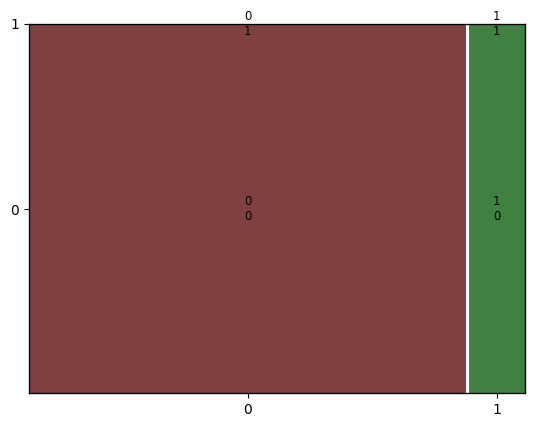

In [53]:
from sklearn.metrics import confusion_matrix
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.metrics import ConfusionMatrixDisplay
conf_matrix = confusion_matrix(y_test, y_pred)
mosaic(conf_matrix)

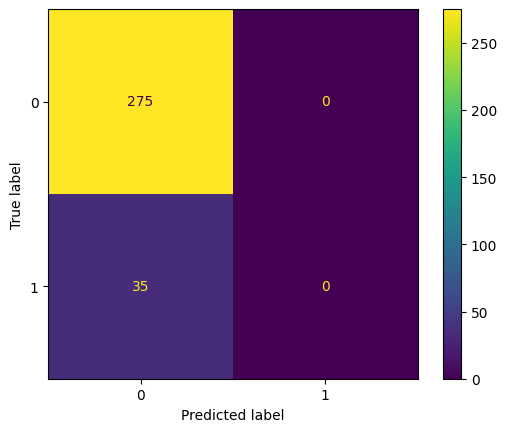

In [54]:
ConfusionMatrixDisplay.from_estimator(regression, X_test, y_test)

With the data standardized, I noticed that the results became better.